In [1]:
import numpy as np
from typing import Tuple
import helper_functions as h

$$ \boldsymbol{X} = \begin{bmatrix} \boldsymbol x^1 & \boldsymbol{x}^2  & \dots & \boldsymbol x^m \end{bmatrix} $$
$$ where \qquad \boldsymbol x^i = \begin{bmatrix}
f_1 \\ f_2 \\ f_3  \\ \vdots  \\ f_d 
\end{bmatrix},\quad i=1 \enspace to \enspace m $$
So $\boldsymbol x^i$ $\rightarrow$ shape=(d,1) 
and $\boldsymbol X$ $\rightarrow$ shape=(d,m)
$$ \boldsymbol{Y} = \begin{bmatrix} y^1 & y^2  & \dots & y^m \end{bmatrix} \\ where \qquad y^i \enspace is \enspace 0 \enspace or \enspace 1 $$
So $\boldsymbol Y$ $\rightarrow$ shape=(1,m) 

**Data used**:
       
<table style="width:50%">
  <tr>
    <td>m (# of samples)</td>
    <td> 500 </td> 
  </tr>
  <tr>
    <td>d (# of features)</td>
    <td> 2 </td> 
  </tr>
  <tr>
    <td> shape of X </td>
    <td> (d,m)=(2, 500) </td> 
  </tr>
  <tr>
    <td>shape of Y </td>
    <td>(1,m)=(1, 500) </td> 
  </tr>
  
</table>

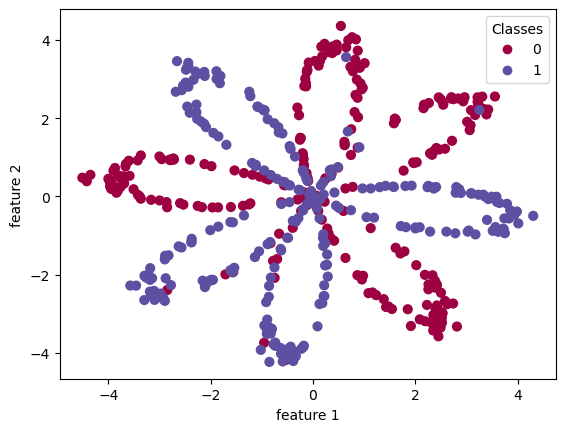

In [2]:
X, Y = h.load_flower_dataset(num_samples=500, petals=4)
h.plot_scatter(X, Y)

**Initialize parameters($\boldsymbol \omega$ and $b$) with zeros**
$$ \boldsymbol \omega = \begin{bmatrix} w_1 \\ w_2 \\ w_3  \\ \vdots  \\ w_d \end{bmatrix},\quad b $$
So $\boldsymbol \omega$ $\rightarrow$ shape=(d,1) 

**Epoch**
<br>
$ \begin{rcases}
\boldsymbol z = \boldsymbol{\omega^T X}+b 
\qquad \qquad \qquad
\color{purple}{shape: \qquad}\color{blue}{(1,m)=(1,d)\times(d,m)} \\
\displaystyle 
\boldsymbol a = \frac{1}{1+e^{-\boldsymbol{z}}} 
\qquad \qquad \qquad \enspace
\color{purple}{shape: \qquad}\color{blue}{(1,m)}
\end{rcases} 
\color{green} \text{forward propagation} $
<br>
$ \displaystyle \mathcal{J} = -\frac{1}{m} sum\{\bold y\ ln(\bold a)+(1-\bold y)\ ln(1-\bold a)\} 
\qquad \qquad \qquad
\color{purple}{shape: } \ \color{blue}{()}
\qquad \color{green} \text{cost function} $
<br>
$ \begin{rcases}
\boldsymbol{dz} = \boldsymbol{a} - \bold{y} 
\qquad \qquad \qquad \color{purple}{shape: } \ \color{blue}{(1,m)} \\
\displaystyle \boldsymbol{d\omega}  = \frac{1}{m} \bold X \ \boldsymbol{dz}^T 
\qquad \qquad \color{purple}{shape: } \ \color{blue}{(d,1)=(d,m) \times (m,1)} \\
\displaystyle db = \frac{1}{m} \ sum\{ \boldsymbol{dz} \} 
\qquad \quad \color{purple}{shape: } \ \color{blue}{()} \qquad \qquad
\end{rcases}
\color{green} \text{gradient descent} $
<br>
$ \begin{rcases}
\boldsymbol{\omega} = \boldsymbol{\omega}-\alpha \ \boldsymbol{d\omega} 
\qquad \qquad \color{purple}{shape: } \ \color{blue}{(d,1)} \\
b = b - \alpha \ db 
\qquad \qquad \quad\color{purple}{shape: } \ \color{blue}{()} \qquad
\end{rcases}
\color{green} \text{Update Parameters after epoch} $

In [3]:
def epoch(X:np.ndarray, Y:np.ndarray, w:np.ndarray, b:np.float64, learning_rate:float=0.005)->Tuple[np.ndarray, np.float64, np.ndarray, np.float64, np.float64]:
    '''
    Perform one epoch(cycle) of training for NEURON[logistic regression]
    
    Parameters
    ----------
    X : numpy.ndarray [shape: (#features, #samples)]
        matrix of data; dtype: float64
    Y : numpy.ndarray [shape: (1, #samples)]
        array containing true labels 0 or 1; dtype: uint8
    w : numpy.ndarray [shape: (#features, 1)]
        array containing weights used by neuron; dtype: float64
    b : np.float64
        bias used by neuron
    learning_rate : float (default=0.05)   

    Returns
    -------
    w : updated array of learned weights by neuron
    b : updated learned bias by neuron
    dw : array containing increments that were added to weights (same shape as w)
    db : increment that was added to bias (same shape as b)
    cost: average loss of samples with input parameters
    '''    
    m = X.shape[1]
    # FORWARD PROPAGATION (FROM X TO A)
    z = np.matmul(w.T,X)+b    # shape(1,m) --> (1,d)X(d,m)
    A = 1/(1+np.exp(-z))      # compute activation; shape(1,m)

    # BACKWARD PROPAGATION (FROM COST TO GRADs)
    cost = -1/m*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))    # shape()/scalar; dtype: np.float64
    dz = A-Y    # shape(1,m)
    dw = 1/m*np.matmul(X,dz.T)    # shape(d,1) --> (d,m)X(m,1)
    db = 1/m*np.sum(dz)           # shape()/scalar

    # UPDATE PARAMETERS
    w = w - learning_rate*dw   # shape(d,1)
    b = b- learning_rate*db    # shape()/scalar
    
    return w, b, dw, db, cost

In [4]:
num_epochs = 100
learning_rate = 0.005
costs = []

## initialize parameters with zeros
w = np.zeros((X.shape[0],1))
b = np.float64(0.0)

print_cost=True

In [5]:
for i in range(num_epochs):
    # Cost and gradient calculation 
    w, b, dw, db, cost = epoch(X, Y, w, b, learning_rate=0.005)   
    
    # Record the costs for every 10 epochs
    if i % 10 == 0 or i == num_epochs-1:
        costs.append(cost)
        # Print the cost every 10 training epochs
        if print_cost:
            print(f"Cost in epochs {i+1}, {cost}")

## Predict train set examples
z = np.matmul(w.T,X)+b      # shape(1,m) --> (1,d)X(d,m)
A = 1/(1+np.exp(-z))        # shape(1,m)
Y_pred = (A >0.5).astype(int)    # shape(1,m)

# Print train/test Errors
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_pred - Y)) * 100))

Cost in epochs 1, 0.6931471805599454
Cost in epochs 11, 0.6901395201780095
Cost in epochs 21, 0.6874312994260537
Cost in epochs 31, 0.6849924431893598
Cost in epochs 41, 0.6827957981256297
Cost in epochs 51, 0.6808168897333792
Cost in epochs 61, 0.67903368778598
Cost in epochs 71, 0.6774263833961542
Cost in epochs 81, 0.6759771797488846
Cost in epochs 91, 0.6746700975997159
Cost in epochs 100, 0.6736033535383488
train accuracy: 47.4 %


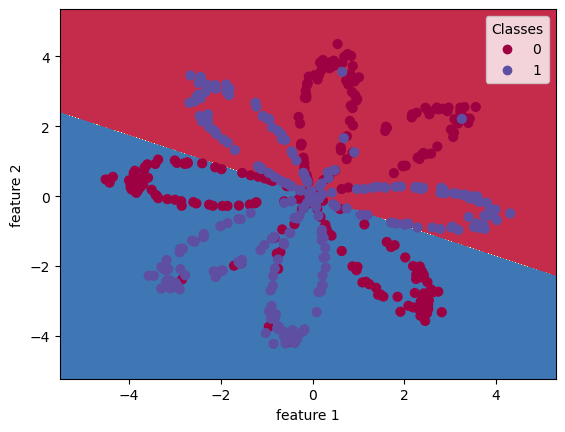

In [6]:
h.plot_decision_boundary(w, b, X, Y)